In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       CONFIRMED              0              0              0              0   
1  FALSE POSITIVE              0              1              0              0   
2  FALSE POSITIVE              0              1              0              0   
3       CONFIRMED              0              0              0              0   
4       CONFIRMED              0              0              0              0   

   koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
0   54.418383     2.479000e-04    -2.479000e-04   162.513840   
1   19.899140     1.490000e-05    -1.490000e-05   175.850252   
2    1.736952     2.630000e-07    -2.630000e-07   170.307565   
3    2.525592     3.760000e-06    -3.760000e-06   171.595550   
4    4.134435     1.050000e-05    -1.050000e-05   172.979370   

   koi_time0bk_err1  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
0          0.003520  ...             -81      4.467           0.064   
1          0.000581  ...            -176      4.544           0.044   
2          0.000115  ...            -174      4.564           0.053   
3          0.001130  ...            -211      4.438           0.070   
4          0.001900  ...            -232      4.486           0.054   

   koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
0          -0.096     0.927          0.105         -0.061  291.93423   
1          -0.176     0.868          0.233         -0.078  297.00482   
2          -0.168     0.791          0.201         -0.067  285.53461   
3          -0.210     1.046          0.334         -0.133  288.75488   
4          -0.229     0.972          0.315         -0.105  296.28613   

         dec  koi_kepmag  
0  48.141651      15.347  
1  48.134129      15.436  
2  48.285210      15.597  
3  48.226200      15.509  
4  48.224670      15.714  

[5 rows x 41 columns]

In [5]:
selected_features=list(df.columns)[1:]


In [6]:
# Set features. This will also be used as your x values.
X = df[selected_features]
X.head()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
0              0              0              0              0   54.418383   
1              0              1              0              0   19.899140   
2              0              1              0              0    1.736952   
3              0              0              0              0    2.525592   
4              0              0              0              0    4.134435   

   koi_period_err1  koi_period_err2  koi_time0bk  koi_time0bk_err1  \
0     2.479000e-04    -2.479000e-04   162.513840          0.003520   
1     1.490000e-05    -1.490000e-05   175.850252          0.000581   
2     2.630000e-07    -2.630000e-07   170.307565          0.000115   
3     3.760000e-06    -3.760000e-06   171.595550          0.001130   
4     1.050000e-05    -1.050000e-05   172.979370          0.001900   

   koi_time0bk_err2  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
0         -0.003520  ...             -81      4.467           0.064   
1         -0.000581  ...            -176      4.544           0.044   
2         -0.000115  ...            -174      4.564           0.053   
3         -0.001130  ...            -211      4.438           0.070   
4         -0.001900  ...            -232      4.486           0.054   

   koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
0          -0.096     0.927          0.105         -0.061  291.93423   
1          -0.176     0.868          0.233         -0.078  297.00482   
2          -0.168     0.791          0.201         -0.067  285.53461   
3          -0.210     1.046          0.334         -0.133  288.75488   
4          -0.229     0.972          0.315         -0.105  296.28613   

         dec  koi_kepmag  
0  48.141651      15.347  
1  48.134129      15.436  
2  48.285210      15.597  
3  48.226200      15.509  
4  48.224670      15.714  

[5 rows x 40 columns]

In [7]:
y=df.koi_disposition
y.head()

0         CONFIRMED
1    FALSE POSITIVE
2    FALSE POSITIVE
3         CONFIRMED
4         CONFIRMED
Name: koi_disposition, dtype: object

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(len(X_test))

1748


In [9]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScater model and fit it to the training data
X_scaler =MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
label_encoder.classes_


array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [11]:
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
encoded_y_test

array([2, 0, 2, ..., 1, 1, 1])

In [12]:
df["encoded_y"] = label_encoder.fit_transform(df['koi_disposition'])
df.head()

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       CONFIRMED              0              0              0              0   
1  FALSE POSITIVE              0              1              0              0   
2  FALSE POSITIVE              0              1              0              0   
3       CONFIRMED              0              0              0              0   
4       CONFIRMED              0              0              0              0   

   koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
0   54.418383     2.479000e-04    -2.479000e-04   162.513840   
1   19.899140     1.490000e-05    -1.490000e-05   175.850252   
2    1.736952     2.630000e-07    -2.630000e-07   170.307565   
3    2.525592     3.760000e-06    -3.760000e-06   171.595550   
4    4.134435     1.050000e-05    -1.050000e-05   172.979370   

   koi_time0bk_err1  ...  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0          0.003520  ...      4.467           0.064          -0.096     0.927   
1          0.000581  ...      4.544           0.044          -0.176     0.868   
2          0.000115  ...      4.564           0.053          -0.168     0.791   
3          0.001130  ...      4.438           0.070          -0.210     1.046   
4          0.001900  ...      4.486           0.054          -0.229     0.972   

   koi_srad_err1  koi_srad_err2         ra        dec  koi_kepmag  encoded_y  
0          0.105         -0.061  291.93423  48.141651      15.347          1  
1          0.233         -0.078  297.00482  48.134129      15.436          2  
2          0.201         -0.067  285.53461  48.285210      15.597          2  
3          0.334         -0.133  288.75488  48.226200      15.509          1  
4          0.315         -0.105  296.28613  48.224670      15.714          1  

[5 rows x 42 columns]

In [13]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,max_features= 'sqrt')
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
rf.fit(X_train_scaled,encoded_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
print(f"Training Data Score: {rf.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8947368421052632


In [16]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 150, 200, 250],'max_features': ['auto', 'sqrt', 'log2']}
grid = GridSearchCV(rf, param_grid, verbose=1,n_jobs=-3,cv=5)

In [17]:
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  38 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-3)]: Done  60 out of  60 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              rando

In [18]:
print(grid.best_params_)
print(grid.best_score_)

{'max_features': 'sqrt', 'n_estimators': 100}
0.8920425850864874


In [22]:
rf = RandomForestClassifier(n_estimators=100,max_features= 'sqrt')
rf.fit(X_train_scaled,encoded_y_train)
print(f"Training Data Score: {rf.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.898741418764302


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
target_name=["CANDIDATE","CONFIRMED","FALSE POSITIVE"]

grid_predictions = grid.predict(X_test_scaled)
  
# print classification report
print(classification_report(encoded_y_test, grid_predictions,target_names=target_name))


                precision    recall  f1-score   support

     CANDIDATE       0.83      0.77      0.80       411
     CONFIRMED       0.84      0.85      0.85       484
FALSE POSITIVE       0.97      1.00      0.98       853

      accuracy                           0.90      1748
     macro avg       0.88      0.87      0.88      1748
  weighted avg       0.90      0.90      0.90      1748



In [33]:
confusion_matrix(encoded_y_test,grid_predictions)

array([[318,  76,  17],
       [ 63, 413,   8],
       [  2,   2, 849]], dtype=int64)

In [27]:
feature_names = X.columns
target_names=['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE']



In [29]:
import matplotlib.pyplot as plt
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, encoded_y_train)
print(clf.score(X_test_scaled, encoded_y_test))


0.8495423340961098


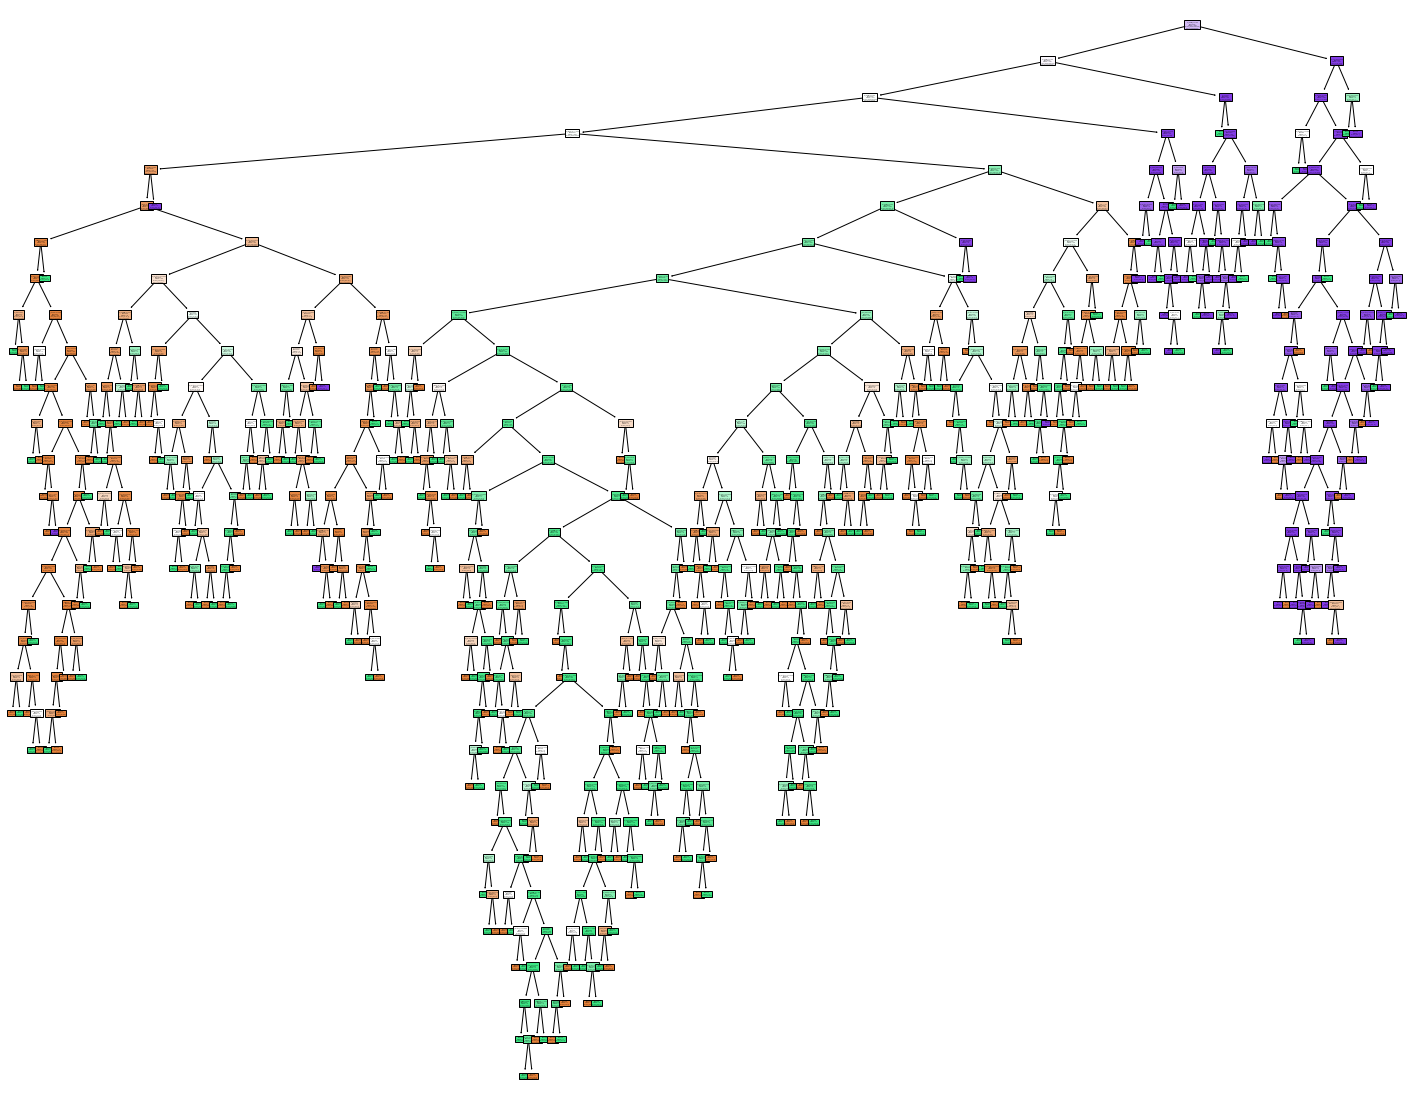

In [28]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names=target_names,
                   filled=True)

